<a href="https://colab.research.google.com/github/luislauriano/Data_Science/blob/master/Analise_de_dados_dos_Albuns_NexoAnexo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spotify & Python & Data Science - Análise de Dados dos Álbuns do artista NexoAnexo**

## **Objetivo do projeto:**

O objetivo desse projeto é que seja feita uma análise de dados dos álbuns do spotify do artista NexoAnexo, passando pelas principais etapas de uma análise de dados. Coleta dos dados, pre-processamento, exploração e visualização dos dados. Por fim, construindo uma aplicação/dashboard com Python e após isso a aplicação será colocada em produção com o heroku. 

Um outro objetivo é que a partir das conclusões feitas da análise dos dados das músicas dos álbuns, seja identificado fatores que ajudam ou contribuem um álbum ou música a ter sucesso e como isso pode ser usado para futuros lançamentos.

## **Etapas do projeto**

* Coleta do dados 
   1. Api do spotify
   2. Dicionario dos dados
   3. Importar os pacotes e dataset necessários
   4. Leitura do arquivo

* Limpeza e preparação dos dados
    1. Deletar colunas
    2. Renomear colunas 
    3. Verificar os tipos das colunas
    4. Alterar os tipos de colunas 
    5. Verificar dados ausentes
    6. Preencher dados ausentes
    7. Corrigindo dados duplicados
    8. Outliers
  
* Exploração e visualização dos dados 
* Aplicação/Dashboard com Python + Deploy com Heroku

## **Coleta dos dados**



A coleta de dados é a primeira etapa de todo projeto de Data Science, caso seja optado por não coletar um conjunto de dados já pronto, devemos procurar fontes de dados que possam ser uteis para construir nossa base de dados e das fontes extrair os dados.

Uma das formas mais famosas de coletar dados já prontos para realizar projetos é buscando em fontes confiaveis como kaggle ou portais governamentais, entretanto, o que queremos são dados que dificilmente encontrariamos na internet, além de se tratar de dados de um artista especifico, ainda assim é um artista que não possui grande popularidade.

A primeira alternativa de coletarmos os dados seria fazendo o uso de web scraping, web scraping como o proprio nome já diz, é a coleta de dados web, ou raspagem web, sendo uma forma de mineração que permite a extração de dados de sites da web, convertendo-os em informação estruturada para posterior análise. Porém, com meu pouco conhecimento em web scraping, não sei se seria possivel coletar os dados do site do spotify.  
Por outro lado, temos uma seguda e mais viavel alternativa, apesar de não ser tão conhecida, o spotify possui uma API onde podemos encontrar e usar os dados de todos os artistas cadastrados no spotify, até mesmo dentro da API é possivel criar dashboards e fazer análises. Mas não é isso que queremos, o que de fato queremos é trabalhar e manipular os dados externamente, para podermos fazer nossas análises com as bibliotecas do python. Como queremos analisar os dados com Python, nada melhor que coletar os dados da API do spotify com o próprio Python, através da biblioteca SpotiPy. 

A biblioteca SpotiPy tem o objetivo de que o usuário tenha acesso total a todos os dados musicais fornecidos pela plataforma Spotify. Com a biblioteca SpotiPy é possivel coletar as mais diversas informações de um artista do Spotify, seja informações das músicas do artista, dos álbuns ou até mesmo informações de catálogo do Spotify sobre artistas semelhantes ao artista identificado. Atráves
da documentação da biblioteca você pode encontrar outras informações que podem ser possiveis de coletar do spotify e começar a aplicar na prática (https://spotipy.readthedocs.io/en/2.12.0/).

### **Coletar os dados da API do Spotify com a biblioteca SpotiPy**

1. Coletar as informações de um artista, dado um nome;
2. Coletar os ids e nomes de todos os álbuns de um artista;
3. Coletar informações de todas as músicas de um álbum;
4. Coletar informações de todas as músicas de todos os álbuns de um artista;
5. Converter tudo para um csv.


In [ ]:
!pip install spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import sys
import csv
 
sp = spotipy.Spotify(client_credentials_manager = SpotifyClientCredentials(client_id="dcffc14978ed497aa58834a7864a99b7", client_secret="e8c5cc78c8e74ccd92323d146c635b47"))

In [ ]:
def get_artist(name):
    results = sp.search(name)
    items = results['tracks']['items']
    if len(items) > 0:
        return items[0]['artists'][0]
    else:
        return None

In [ ]:
def get_artist_id(artist):
    return artist['id']

In [ ]:
def get_artist_albums_id_names(id):
  albums = sp.artist_albums(id, country = 'BR', limit=3)
  albums_id_name = {}
  for i in range(len(albums['items'])):
    id = albums['items'][i]['id']
    name = albums['items'][i]['name']
    albums_id_name[id] = name
 
  return albums_id_name

Determinei o limit igual a três, tendo em vista que o artista NexoAnexo possui três álbuns. Se quisessemos visualizar as outras músicas poderiamos aumentar esse limit para cinquenta ou mais, de acordo com o total de musicas do artista no spotify.

In [ ]:
def get_album_songs(album_id, album_name):
  spotify_album = {}
 
  tracks = sp.album_tracks(album_id)
  
  for n in range(len(tracks['items'])):
    id_track = tracks['items'][n]['id']
    track = sp.track(id_track)
    spotify_album[id_track] = {}
    
    spotify_album[id_track]['album'] = album_name
    spotify_album[id_track]['album_type'] = track['album']['album_type']
    spotify_album[id_track]['track_number'] = track['track_number']
    spotify_album[id_track]['id_track'] = track['id']
    spotify_album[id_track]['name'] = track['name']
    spotify_album[id_track]['popularity'] = track['popularity']
    spotify_album[id_track]['explicit'] = track['explicit']
    spotify_album[id_track]['duration_ms'] = track['duration_ms']
    spotify_album[id_track]['release_date'] = track['album']['release_date']
 
    artists_track = track['artists']
    spotify_album[id_track]['artists'] = []
    for artist in artists_track:
      spotify_album[id_track]['artists'].append(artist['name'])
  return spotify_album


In [ ]:
def get_all_albums_songs(albums_ids_names):
  spotify_albums = []
  albums_names = []
  for id, name in albums_ids_names.items():
    if name not in albums_names:
      albums_names.append(name)
      album_songs = get_album_songs(id,name) 
    for item in album_songs.items():
      spotify_albums.append(item[1]) 
  return spotify_albums

In [ ]:
def convert_to_csv(filepath, name):
  keys = filepath[0].keys()
  print(keys)
  csv_name = ''+ name + '.csv'
  with open(csv_name, 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(filepath)
  return

In [ ]:
name = "NexoAnexo"
artist = get_artist(name)    
if artist:
  artist_id = get_artist_id(artist)
  albums_id_names = get_artist_albums_id_names(artist_id)
  all_albums = get_all_albums_songs(albums_id_names)
  convert_to_csv(all_albums, 'NexoAnexo')   
else:
  logger.error("Can't find artist: %s", artist)

dict_keys(['album', 'album_type', 'track_number', 'id_track', 'name', 'popularity', 'explicit', 'duration_ms', 'release_date', 'artists'])


Como a popularidade das músicas podem alterar diariamente, para não interferir na análise, era preciso utilizar um conjunto de dados de um dia especifico, por isso motivo foi utilizado o conjunto de dados do dia 26-06-2020.

### **O artista NexoAnexo**

![NexoAnexo](https://pbs.twimg.com/media/D-gIKsxWkAMBscr.jpg)

Nascido em 29 de janeiro de 1997, NexoAnexo, é um artista e produtor pernambucano, difusor da trap Music no Brasil. Nascido e criado na Zona Oeste do Recife e tido como uma das promessas nordestinas do trap nacional pela revista @RND, atualmente membro da banca e produtora HoodCave.

### **Dicionario dos dados**

Algumas coisas precisam ser definidas para que a análise fique clara e todos possam entender, então:

O Spotify disponibiliza a popularidade de uma faixa, então obviamente usaremos a popularidade da faixa como uma de nossas variaveis para análise, mas como é feito o cálculo da populariade?. O cálculo da popularidade é feito pelo número de ouvintes daquela música e que na API é definida assim:

*Popularidade da faixa: O valor estará entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada e baseia-se na maior parte no número total de reproduções que a faixa teve e quão recentes foram estas reproduções. Logo, as músicas que estão sendo tocadas com uma maior frequência atualmente terão uma popularidade maior do que as músicas que foram muito tocadas no passado.*

Lembre-se disso, vai ser muito importante pra nossa análise.

O albúm Trap From Future é o único que de fato se trata de um albúm do artista NexoAnexo, sendo o seu primeiro e que foi lançado nesse ano de 2020. Real Plug Mixtape e Trap de Cria Mixtape são como o próprio nome diz "mixtapes", porém, no spotify as duas mixtapes são consideras como albúm, logo, iremos levar suas músicas como consideração para a análise.



**Informações sobre as variáveis**


É importante saber o que cada variável (coluna) significa e a importância delas para o conjunto de dados, para ter um entendimento inicial dos dados. Se o conjunto de dados for da web, normalmente deve ter allguma descrição no site, caso seja um conjunto de dados da empresa, é importante conversar com o pessoal da área de negocios, que normalmente são os que tem um maior entendimento do conjunto de dados. Também não pode ficar de fora uma conversa com alguém especialista no assunto que envolve o conjunto de dados, tendo em vista que é preciso além de entender os dados, entender o meio em que os dados estão envolvidos, para se construir hipoteses e tirar conclusões. 

Como eu mesmo fui o responsável por coletar esse conjunto de dados, não encontrei nenhuma informação disponivel sobre as variaveis, porém, o meu entendimento como usuario do spotify foi util o bastante para entender e criar hipoteses sobre o conjunto de dados, além de conhecer, entender e acompanhar as músicas do artista NexoAnexo.

* album = Nome do albúm
* album_type = Música ou Albúm (Como os dados coletados foram apenas dos álbuns, o tipo sempre será albúm)
* track_number = Posição da música no albúm
* id_track = ID da música no Spotify
* name = Nome da música
* popularity = Popularidade da música
* explicit = A música é explicita ou não
* duration_ms  = Duração da música
* release_date = Data de Lançamento da música
* artists = Nome do artista responsavel pela música


### **Importar os pacotes e datasets necessário**



As bibliotecas que foram utilizadas são as bibliotecas consideradas essenciais para uma análise de dados, sendo Pandas a principal delas, tendo em vista a necessidade de manipular e analisar os dados.

In [ ]:
#importar os pacotes necessarios
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

#Configurar o notebook
sns.set_style('whitegrid');

#Alterando estilo do matplolib
plt.style.use('ggplot')

### **Leitura do arquivo**

Antes de tudo, deve ser feita uma leitura do arquivo que será utilizado, retirando algumas informações básicas, como: "Como os dados estão separados?", "Qual o tamanho do arquivo", "Quantos registros possuem?", "Vai demorar para o Google colab ler o arquivo?". Essas perguntas são importantes para quando necessario importar o conjunto de dados com o Pandas.

Abrindo o arquivo NexoAnexo.csv, obviamente, foi possivel identificar que se trata de um arquivo no formato CSV, os dados estão separados por "," e o conjunto possue 34 linhas, ou seja, se trata de um conjunto de dados pequeno e o Google colab não terá muitos problemas para ler o arquivo.

In [ ]:
#Importando o conjunto de dados NexoAnexo
df = pd.read_csv('https://raw.githubusercontent.com/luislauriano/Data_Science/master/Datasets/NexoAnexo%20(1).csv', sep=',')

Em alguns casos reais, onde é trabalhado com conjuntos de dados maiores e conseguentemente mais pesados, essa etapa de importar os dados pode ser mais trabalhosa, por exigir outros parametros, como header, skiprows, skipfooter, delimiter e entre outros, para que a importação do conjunto de dados ocorra.

Como antes mesmo de importar o conjunto de dados, foi feita uma leitura, eu sei que o conjunto de dados possue 33 linhas, porém, será que a leitura dos dados foi corretamente? Então o primeiro entendimento dos dados será quantas linhas e colunas o conjunto de dados possue.

In [ ]:
#Numero de linhas e colunas
print(f'Número de linhas ou variaveis {df.shape[0]}')
print(f'Número de entradas ou colunas {df.shape[1]}')

Número de linhas ou variaveis 33
Número de entradas ou colunas 10


Se observado, a leitura dos dados foi feita de maneira correta e agora sabemos que o conjunto de dados possue 33 linhas ou variaveis e 10 entradas ou colunas. Por mais que pareça algo simples e insignificante, essas informações dão uma noção e entendimento importante para as proximas etapas, como a etapa de deletar colunas ou dados que não serão usados na análise.

## **Limpeza e preparação dos dados**

A etapa de pre-processamento dos dados ou limpeza e preparação dos dados é uma das mais importantes de todo projeto de Data Science ou Machine Learning. Nessa etapa, os dados precisam ser manipulados e tratados, sendo a biblioteca Pandas a principal por desempenhar esse papel. A etapa se dá de forma continua, podendo acontecer durante todo o projeto e não apenas em sua fase especifica, também é a etapa que mais demanda tempo do cientista ou analista de dados, "será que a demanda maior de tempo seja por se tratar da mais importante?". O pre-processamento de dados envolve muito tratamento dos dados e nem tudo será visto nesse projeto. 


A limpeza e manipulação dos dados nesse projeto pode parecer algo muito simples e que inicialmente não tem significado, porém, nos casos reais os dados dificilmente virão tratados, limpos e organizados. Por isso, tanto se fala que essa etapa é a etapa que mais se demanda tempo. Sendo a responsável por fazer uma amostra limpa dos dados, para que assim os dados possam ser utilizados em etapas futuras, como na analise exploratoria dos dados, onde os dados precisam estar limpos e organizados para ganharem significados.

A biblioteca Pandas além de ser a principal biblioteca do Python para se manipular e tratar os dados, como será visto na etapa de pré-processamento dos dados. Também é a melhor biblioteca do Python para analisar os dados e por isso grande parte do projeto foi realizado com o uso do Pandas, tendo em vista que o objetivo do projeto é justamente analisar os dados do spotify do artista NexoAnexo. Algumas das atividades que fazem da biblioteca Pandas tão util para manipulação e analise de dados, são: 

* Objeto DataFrame para manipulação de dados com indexação integrada.
* Ferramentas para ler e gravar dados entre estruturas de dados na memória e diferentes formatos de arquivo.
* Alinhamento de dados e tratamento integrado de dados ausentes.
* Remodelagem e dinamização de conjuntos de dados.
* Inserção e exclusão de colunas de estrutura de dados.
* Grupo por mecanismo, permitindo operações dividir-aplicar-combinar em conjuntos de dados.
* Combinação e junção de conjuntos de dados.


### **Deletando colunas**

A primeira etapa que sempre costumo realizar no pré-processamento de dados é a de deletar os dados, ou melhor, deletar as colunas. Dependendo do seu tamanho, um conjunto de dados em muito dos casos possuem colunas que não são uteis para o objetivo do projeto, até mesmo mais de dez colunas que estão ali apenas ocupando um espaço. Consequentemente, os dados dessas colunas só estão ocupando espaço de memoria e dificultando a análise dos dados.

In [ ]:
#As colunas que pertencem ao conjunto de dados
df.columns

Index(['album', 'album_type', 'track_number', 'id_track', 'name', 'popularity',
       'explicit', 'duration_ms', 'release_date', 'artists'],
      dtype='object')

O conjunto de dados dos albums retirado do spotify do artista contém colunas que não são uteis para o objetivo do projeto. Colunas como duração da música e se a música é explicita ou não, que não são uteis o projeto, porém seriam interessantes se o objetivo do projeto fosse criar um modelo de Machine Learning. Outras colunas como id da música, data de lançamento e artistas que comporão, também serão deletadas.

Antes de deletar as colunas, mesmo que tenha sido feita uma leitura do arquivo antes do mesmo ser importado para a análise, é importante que novamente se avalie como os dados estão se comportando, quais são as primeiras e ultimas linhas do conjunto de dados e como cada coluna está representada. Perguntas como essas são importante por começarem a dar um entendimento e informação sobre o conjunto de dados e se chegar na análise exploratoria já com boas ideias de hipoteses.  

In [ ]:
#As 5 primeiras linhas do conjunto de dados
df.head()

,album,album_type,track_number,id_track,name,popularity,explicit,duration_ms,release_date,artists
0,Trap from Future,album,1,6Mx214YlNnbj7un9PrvmGi,Vem No Tum Tum,17,True,216917,2020-03-13,['NexoAnexo']
1,Trap from Future,album,2,1xOs8YJkkKm5HhRiP1ha4g,Drip Know Me,3,True,154646,2020-03-13,"['NexoAnexo', 'Drippy Kid Jay']"
2,Trap from Future,album,3,4s4G0Z6mSkrauIvBXRlVHk,Match,4,True,180716,2020-03-13,['NexoAnexo']
3,Trap from Future,album,4,5C1iQCV3xuc0oHQpe7fhhQ,Trap & Brega,6,True,164468,2020-03-13,['NexoAnexo']
4,Trap from Future,album,5,3H2TfCpxaSfEh5nVbcDzrp,Marca Sem Roupa,6,True,148364,2020-03-13,"['NexoAnexo', 'Victor KR']"


In [ ]:
#As 5 últimas linhas
df.tail()

,album,album_type,track_number,id_track,name,popularity,explicit,duration_ms,release_date,artists
28,Real Plug Mixtape,album,4,6JM9oQxdsP9ZBr7MD0bjzf,Nxanx,0,True,167355,2018-05-15,"['NexoAnexo', 'Guimael']"
29,Real Plug Mixtape,album,5,2JlPpGTj9MuKjLRD27DXwH,Tudo,0,True,161403,2018-05-15,"['NexoAnexo', 'TheKickBoy']"
30,Real Plug Mixtape,album,6,1dHrNfJgczkxDCOBtiGJkv,A Lei,0,True,134274,2018-05-15,"['NexoAnexo', 'LC']"
31,Real Plug Mixtape,album,7,4rDhvolZebPhxzs8wPq802,Dreams Cup,0,True,230822,2018-05-15,"['NexoAnexo', '$ketchBoyBeat$']"
32,Real Plug Mixtape,album,8,21hFSC02UuBc4NfHv10J8O,2020,4,True,154298,2018-05-15,['NexoAnexo']


In [ ]:
#Uma amostra de 5 registros (linhas) dos dados
df.sample(5)

,album,album_type,track_number,id_track,name,popularity,explicit,duration_ms,release_date,artists
7,Trap from Future,album,8,3yFbmcmxdQ9ZW5KL4BWNTM,Fuck Cópias,2,True,140880,2020-03-13,"['NexoAnexo', 'Vitorm']"
0,Trap from Future,album,1,6Mx214YlNnbj7un9PrvmGi,Vem No Tum Tum,17,True,216917,2020-03-13,['NexoAnexo']
25,Real Plug Mixtape,album,1,6sCyj7quVzcGbs9kAxrrzV,The Train,0,True,169865,2018-05-15,"['NexoAnexo', 'GG', 'Young Zine']"
13,Trap from Future,album,14,5aTZgS07v6N3ad4kykhDmU,Zombieland,1,True,190357,2020-03-13,['NexoAnexo']
2,Trap from Future,album,3,4s4G0Z6mSkrauIvBXRlVHk,Match,4,True,180716,2020-03-13,['NexoAnexo']


O Pandas é uma biblioteca que suas ações em sua maioria podem ser realizadas de diversas formas, ou seja, pode ser utilizado mais de um método ou atributo para realizar algo. Logo, é importante que sejam mantidas boas práticas ao usar a biblioteca. Um exemplo é que para deletar as colunas, poderia ser utilizado o método drop() ou o método copy(). Veja:

* df = df.drop([‘coluna1’, 'coluna2', 'coluna3'], axis = ‘columns’)

Dessa forma, as colunas são deletadas permanentemente do conjunto de dados e posteriormente, se necessario, eu não consegueria trabalhar com as colunas.

Por isso, a forma que considero melhor de se deletar as colunas é após ter sido feita uma análise de quais colunas são importantes para o objetivo do projeto. Selecionar as colunas que se deseja utilizar com CTRL + C através do atributo **df.columns** e posteriormente passar um array com os nomes das colunas que desejamos e na ordem desejada, através do método **.copy()**. Assim, as outras colunas serão omitidas e não deletadas. 

In [ ]:
#Selecionando as colunas com CTRL + C
df.columns

Index(['album', 'album_type', 'track_number', 'id_track', 'name', 'popularity',
       'explicit', 'duration_ms', 'release_date', 'artists'],
      dtype='object')

Dessa forma, consigo ter uma visão de todas as minhas colunas e selecionar as que desejo, para passar seus nomes no array e criar um novo dataframe, com novas colunas.

In [ ]:
#Novo dataframe 
df = df[['album', 'name', 'track_number', 'popularity', 'duration_ms']].copy()

Deletando as colunas dessa maneira eu consigo escolher uma nova ordem para as colunas, além de não delatar proprimamente as outras colunas que foram descartadas, por não ser útil para o projeto.

In [ ]:
#Novas colunas
df.columns

Index(['album', 'name', 'track_number', 'popularity', 'duration_ms'], dtype='object')

### **Renomeando colunas**

Como já dito anteriormente, um dataset dificilmente irá vim organizado e limpo, sendo um dos principais problemas ao receber um dataset que não seja da internet, onde em sua maioria os dados já vem organizados e sim um dataset de um caso real, é a forma incorreta de como os dados e variaveis estão registrados no dataset. Sendo  necessário fazer toda manipulação dos dados, engenharia de recursos, renomeação de variáveis e etc... Apesar dos dados do dataset que estou utilizando não apresentar muito desses problemas, as colunas além de estarem em inglês, seu nome não deixa claro do que se trata a coluna. Por esses motivos, é interessante sempre manter o nome das colunas de forma que remeta claramente do que se trata a coluna, para que futuramente tenha facilidade quando for necessario usar a coluna para fazer alguma análise.

In [ ]:
#Renomeando as colunas
df.columns = ['nome_do_album', 'nome_da_faixa',  'posicao_da_faixa', 'popularidade', 'duraçao_da_musica']

In [ ]:
#As três primeiras linhas do dataset
df.head(3)

,nome_do_album,nome_da_faixa,posicao_da_faixa,popularidade,duraçao_da_musica
0,Trap from Future,Vem No Tum Tum,1,17,216917
1,Trap from Future,Drip Know Me,2,3,154646
2,Trap from Future,Match,3,4,180716


Com as colunas renomeadas, quando for necessario chamar o nome da coluna para realizar uma análise ou outra tarefa, ficará tudo mais fácil. Vale ressaltar que também é importante sempre manter o nome das colunas com letras minúsculas e se necessário separar, que seja com o _, para também facilitar as tarefas que serão realizadas posteriormente com as colunas.

### **Verificar dados ausentes**

Os dados ausentes em sua maioria podem ocorrer devido a não-resposta, ou seja, nenhuma informação foi registrada para uma variável, sendo mais um dos problemas de sujeira que pode aparecer em um dataset, que assim como outros problemas da etapa de limpeza e preparação dos dados que aqui já foi dito, os dados ausentes precisam ser limpados e tratados, de modo que deixem de ser dados ausentes e passem a ganhar significado. Dessa forma, antes de limpar e tratar os dados ausentes, primeiro é preciso identificar se existe a presença de dados ausentes ou faltantes no dataset. 

Para identificar a presença de dados ausentes, eu poderia ter usado o método isnull(), porém para sempre manter as boas práticas ao utilizar a biblioteca pandas, é interessante utilizar o método isna(), devido que o final "na" do método remete ao dropna e fillna, que são metodos que também trabalham de alguma forma com dados ausentes. 

In [ ]:
#Identificando a presença de dados ausentes
df.isna().sum()

nome_do_album        0
nome_da_faixa        0
posicao_da_faixa     0
popularidade         0
duraçao_da_musica    0
dtype: int64

O dataset do artista NexoAnexo que foi retirado do spotify não possui dados ausentes, porém, muita das vezes uma coluna pode ter o registro de dados e os dados ainda assim serem dados ausentes (ocultos), ou seja, é informado pelo método que o conjunto de dados não possui valores ausentes ou nulos, por todos os dados estarem registrados, entranto, esse registro de dados não tem valor significativo e os dados não passam nenhuma informação util. Casos como esse de dados ausentes ocultos, acontece em sua maioria quando quem coleta os dados e constroi o dataset não  tem o valor ou informação exata e faz o registro de dados com um valor qualquer, como 0.

A melhor solução para casos como esse é analisar com calma os primeiros, ultimos e amostras aleatórias dos registros, averiguando se os dados realmente passam alguma informação e significado, já que não temos dados ausentes.

In [ ]:
#Os 10 primeiros registros
df.head(10)

,nome_do_album,nome_da_faixa,posicao_da_faixa,popularidade,duraçao_da_musica
0,Trap from Future,Vem No Tum Tum,1,17,216917
1,Trap from Future,Drip Know Me,2,3,154646
2,Trap from Future,Match,3,4,180716
3,Trap from Future,Trap & Brega,4,6,164468
4,Trap from Future,Marca Sem Roupa,5,6,148364
5,Trap from Future,Wow!,6,3,145675
6,Trap from Future,Não Posso Morrer Novo,7,3,150116
7,Trap from Future,Fuck Cópias,8,2,140880
8,Trap from Future,Passa Nada,9,3,135745
9,Trap from Future,Novo Rock,10,1,130971


In [ ]:
#Os 10 últimos registros
df.tail(10)

,nome_do_album,nome_da_faixa,posicao_da_faixa,popularidade,duraçao_da_musica
23,Trap de Cria Mixtape,Isso Que É Foda,9,4,135086
24,Trap de Cria Mixtape,Pjl,10,0,211323
25,Real Plug Mixtape,The Train,1,0,169865
26,Real Plug Mixtape,Fica Bem,2,0,130134
27,Real Plug Mixtape,Gospel,3,0,122278
28,Real Plug Mixtape,Nxanx,4,0,167355
29,Real Plug Mixtape,Tudo,5,0,161403
30,Real Plug Mixtape,A Lei,6,0,134274
31,Real Plug Mixtape,Dreams Cup,7,0,230822
32,Real Plug Mixtape,2020,8,4,154298


In [ ]:
#Amostra aleatória de 10 registros
df.sample(10)

,nome_do_album,nome_da_faixa,posicao_da_faixa,popularidade,duraçao_da_musica
7,Trap from Future,Fuck Cópias,8,2,140880
4,Trap from Future,Marca Sem Roupa,5,6,148364
22,Trap de Cria Mixtape,Bebê da Cara de Mal,8,1,174180
14,Trap from Future,Baila Comigo?,15,2,192530
10,Trap from Future,Como Tem Que Ser,11,3,169166
31,Real Plug Mixtape,Dreams Cup,7,0,230822
26,Real Plug Mixtape,Fica Bem,2,0,130134
3,Trap from Future,Trap & Brega,4,6,164468
32,Real Plug Mixtape,2020,8,4,154298
19,Trap de Cria Mixtape,Video Call,5,1,192468


Todos os registros passam alguma informação. Devido ao fato do albúm Real plug Mixtape ser o albúm mais antigo, sua popularidade apresenta muitos valores zero, tendo em vista, que a popularidade está relacionada as músicas que estão sendo ouvidas no momento, porém, diante mão já é possivel observar que a faixa 2020 ainda se mantém com uma boa popularidade se compararmos com faixas mais recentes, apesar de ter sido uma música lançada em 2018. 

De fato 2020 poderia ter sido um ano de sucesso para o artista NexoAnexo e uma ascensao da faixa 2020, como uma grande promessa, porém, a música também fala de anos posteriores, como 2022 e 2023, quem sabe nos próximos anos coisas grandes não venham a acontecer.

### **Verificar os tipos de colunas** 

Assim como pode ser feito registro de dados sem nenhum significado, por quem constroi o dataset, as colunas também podem ser preenchidas de forma incorreta, ou seja, uma coluna que trata-se de uma coluna do tipo inteira, pode estar como coluna do tipo float ou até mesmo string.

In [ ]:
#Verificando os tipos das colunas
df.dtypes

nome_do_album        object
nome_da_faixa        object
posicao_da_faixa      int64
popularidade          int64
duraçao_da_musica     int64
dtype: object

In [ ]:
#Quantidade de tipos das colunas
df.dtypes.value_counts()

int64     3
object    2
dtype: int64

Agora eu sei quais são os tipos das minhas colunas, mas ainda é preciso confirmar se os tipos foram registrados corretamente e para isso é preciso visualizar novamente os registros de dados de cada coluna, com atenção! Saber quais são os tipos das colunas e como manipulá-los é de extrema importância para a etapa futura de exploração dos dados. 

In [ ]:
#Visualizando novamente os dados
df.sample(5)

,nome_do_album,nome_da_faixa,posicao_da_faixa,popularidade,duraçao_da_musica
26,Real Plug Mixtape,Fica Bem,2,0,130134
32,Real Plug Mixtape,2020,8,4,154298
8,Trap from Future,Passa Nada,9,3,135745
9,Trap from Future,Novo Rock,10,1,130971
27,Real Plug Mixtape,Gospel,3,0,122278


### **Alterando tipo de colunas**

Nesse projeto não irei alterar o tipo das colunas, por já estarem corretos, mas em casos reais atividades como essa são comuns e saber fazer esse tipo de manipulação de dados é de extrema importância, para que os dados de fato cheguem preparados para a análise exploratória. Em alguns casos, um simples caractere diferente que exista nos dados de uma coluna, pode fazer a diferença no seu tipo, sendo necessario manipular os dados da coluna. 

Se por exemplo, fosse necessário alterar o tipo da coluna popularidade, poderia ser utilizado o método astypes(), principal método para realizar essa tarefa, passando o novo tipo de dados da coluna.

In [ ]:
#Alterando a coluna popularidade para float
df['popularidade'] = df['popularidade'].astype(float)

In [ ]:
#Tipos das colunas
df.dtypes

nome_do_album         object
nome_da_faixa         object
posicao_da_faixa       int64
popularidade         float64
duraçao_da_musica      int64
dtype: object

In [ ]:
#Corrigindo o tipo da coluna popularidade para inteiro
df['popularidade'] = df['popularidade'].astype(int)

### **Corrigindo dados duplicados**

Outra tarefa importante da etapa de limpeza e preparação de dados é a correção de dados duplicados, por mais que esse dataset do spotify do artista NexoAnexo não possua dados duplicados, é comum encontrar em alguns conjuntos de dados. Os valores duplicados na maioria dos conjuntos de dados são encontrados com frequência e dependendo da análise que será feita, esses valores podem alterar o resultado final.

#### **Verificando valores duplicados**

Por se tratar de um dataset com diversas músicas e números, é importante verificar se o dataset possui dados duplicados, para que a análise e os insights não sejam interferidos. Para identificar a presença de outliers, irei utilizar o método duplicated() que devolve uma Series booleana informando True se possui algum valor duplicado e False caso contrário.

In [ ]:
#Verificando valores duplicados
df.duplicated().value_counts()

False    33
dtype: int64

O dataset não possui dados duplicados como mencionado anteriormente, porém, caso fosse identificado a presença de dados duplicados, seria necessário remover todos os valores repetidos, fazendo o uso do método drop_duplicates().

### **Outliers**

Os outliers, são os famosos "pontos fora da curva" ou observações que não parecem seguir o mesmo padrão dos demais dados. Normalmente acarretados de distribuições diferentes, serem erros da coleta de dados, como aqui já foi visto, erros de medição ou outro fator. Identificar e tratar os outliers é de suma importância, devido que os outliers influenciam diretamente nas análises e nos algoritmos, ao apresentar comportamento distoante do resto do data set. Impactando tanto na média, como na variância, funções de perda e custo.

Após os outliers terem sido identificados, sua remoção ou transformação só deve ser feita se realmente fizer sentido, logo, deve ser levado em consideração que alguns outliers são dados autenticos e devem ser estudados com atenção, para saber se de fato deve ser feita sua remoção.

####**Identificando outliers**

Dificilmente será econtrado outliers nesse dataset do spotify, por ser um dataset que não tem sujeiras e está bem organizado e limpo, além das variaveis serem muito discrepantes por sua natureza, porém, irei verificar se existe a presença de algum outlier na coluna de duração da música. Para identificar a presença de outliers a melhor solução é verificar a distribuição dos dados, que pode ser feita tanto com gráfico de histograma ou com gráfico de boxplot.

/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


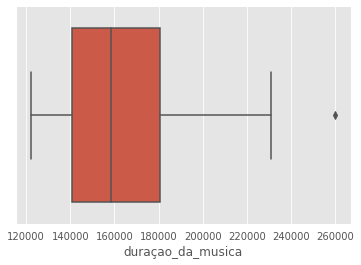

In [ ]:
#Plotando gráfico de boxplot
sns.boxplot(x=df["duraçao_da_musica"], orient="vertical");

No boxplot, os dados mais extremos, ou seja, os outliers, são mostrados como pontos fora do alcance dos whiskers (as barras do boxplot) e neste caso da coluna duração da música é possivel observar que existe um ponto (outlier) acima do normal. Agora, irei apicar uma abordagem para identificar qual é esse ponto acima.

Tudo que estiver acima do intervalo (limite) $[Q3 + 1.5 \times \text{IQR}]$ e abaixo do intervalo (limite) $[Q1 - 1.5 \times \text{IQR}]$será considerado um outlier. 

Considere: 
* Q3 e Q1 = Terceiro quantil e Primeiro quantil. 
* IQR = Intervalo interquartil (Q3 - Q1).

In [ ]:
#Construindo o intervalo interquartil
q1 = df.duraçao_da_musica.quantile(0.25)
q3 = df.duraçao_da_musica.quantile(0.75)

iqr = q3 - q1

In [ ]:
#Limite inferior [Q1−1.5×IQR]
out_low = q1 - 1.5 * iqr 
out_low

#Limite superior [Q3+1.5×IQR]
out_high = q3 + 1.5 * iqr 
out_high

print(f'''Limite ou intervalo inferior: {out_low} 
Limite ou intervalo superior: {out_high}''')

Limite ou intervalo inferior: 81126.0 
Limite ou intervalo superior: 240470.0


Agora que defini quais são os limites inferiores e superiores, é possivel identificar quais são os pontos que encontram-se fora desses limites ou intervalos, ou seja, que podem ser considerados outliers.

In [ ]:
#Identificando os outliers presentes
outliers = df.duraçao_da_musica[(df.duraçao_da_musica < out_low) | (df.duraçao_da_musica > out_high)]
outliers

12    260158
Name: duraçao_da_musica, dtype: int64

In [ ]:
#Quem é o outlier? 
df.query("index == 12")

,nome_do_album,nome_da_faixa,posicao_da_faixa,popularidade,duraçao_da_musica
12,Trap from Future,Fogo No Incenso,13,5,260158


O código me retornou tudo que foi menor e tudo que foi maior do que o limite normal que foram definidos e assim como foi visto no boxplot, existe apenas um outlier acima do limite superior. Porém, os dados do dataset tratam-se de dados que são discrepantes por sua natureza, especificamente a coluna que está sendo analisada, que é relacionada ao tempo de duração da música, logo, não faz sentido remover esse outlier, o que só acarretaria em prejuízo à análise.

## **Exploração e Visualização de dados**

Segundo o esatístico John Tukey, a etapa de exploração de dados ou EDA pode ser definida como: 

*Procedimentos para analisar dados, técnicas para interpretar os resultados de tais procedimentos, formas de planejar a reunião dos dados para tornar sua análise mais fácil, mais precisa ou mais exata e toda a maquinaria e os resultados da estatística (matemática) que se aplicam a análise de dados.*






A exploração de dados ou EDA pode ser considerada uma das fases mais importantes de todo processo de análise de dados. A partir dela começamos a entender mais sobre os dados que envolve a problematica e conseguentemente construir hipoteses e perguntas. Nessa fase, para ajudar no trabalho de entendimento e exploração dos dados é feito o uso de ferramentas estatísticas e de visualização de dados, para que as informações a respeito dos dados sejam a mais clara possivel. Não deve ser levado em consideração um conjunto de regras e passo a passo na hora de construir a análise exploratoria de dados, pelo contrario, a análise exploratória de dados não se trata de um processo formal e sim um estado de espirito investigativo. Na EDA o mais importante é investigar todas as ideias que ocorrerem, conforme o entendimento e significado dos dados vai aumentando.

Pode-se dizer que a EDA é um ciclo iterativo e ciclico, onde:

* É preciso gerar questões relevantes para o negócio, logo, é essencial que em casos reais exista uma conversa com o pessoal da aréa de negocio, a respeito dos dados e oque o pessoal da área de negocio está buscando responder através do conjunto de dados.

* Para encontrar as respostas dos questionamentos levantados é preciso gerar gráficos, manipulação e estatística sobre os dados.

* Refinar os questioanamentos e utiliza-los para gerar novos questionamentos pertinentes. 

Um fator essencial que muita das vezes é negligenciado por quem está começando na área dos dados é a estatistica. A estatística tanto univariada como multivariada é de suma importância para os dados ganharem ainda mais significado, durante a exploração de dados.

Fazer uma análise exploratória de dados sempre deve ser levado como objetivo gerar **Perguntas** e **Hipoteses**. Logo, irei definir algumas perguntas e hipoteses que tenho inicialmente e responder durante a análise exploratoria de dados, para reter uma informação inicial dos dados. Como já dito anteriormente, durante a análise exploratoria de dados surgem mais perguntas, conforme os dados vão ganhando significado e o entendimento a respeito dos dados vai aumentando. Então, é sempre bom começar com perguntas simples e ir aumentando suas complexidades conforme se vai conhecendo os dados, o que também é um dos objetivos da análise exploratória de dados, você tomar conhecimento dos seus dados. Vale lembrar que quando se lida com um novo conjunto de dados, nem sempre tem informações disponiveis sobre os dados, sendo necessario buscar o conhecimento de uma pessoa especialista no assunto, conversar com estas pessoas influenciará e ajudará em perguntas futuras, tendo em vista que não é possivel gerar perguntas sem entender a problematica que envolve os dados e o meio que os dados estão envolvidos, muito menos sem entender o conjunto de dados em si. Nos casos reais, em sua maioria das vezes o pessoal da área de negocios que tem um maior entendimento da problematica e área que envolve os dados, além do conjunto de dados, por isso são os principais responvaveis por gerarem as perguntas que se deseja responder na análise exploratoria de dados.

A análise exploratoria deve se chegar ao fim quando for identificado que já se atingiu o objetivo desejado e os questionamentos principais já foram respondidos, sendo em casos reais responsabilidade do pessoal da área de negócios, que são os responsáveis por fazerem os questionamentos a respeito dos dados, além de na maioria das vezes terem um entendimento maior sobre os dados e a área que os mesmo estão envolvidos.

### **Perguntas:**

* Qual é a música mais popular no momento do artista NexoAnexo?
* Qual a música mais popular de cada albúm?
* A popularidade das músicas tem relação com a posição?
* Qual a média da popularidade dos albúns?
* A música que está na posição um dos álbuns, apresenta sempre maior popularidade?


### **Hipóteses:**

* Trap&Brega 
* 2020 (Real plug mixtape), E AI fake (Trap de Cria), Vem no tum tum (Trap From Future)
* Sim
* 3.0
* Sim

###**Definindo as variáveis dos albúns**

In [ ]:
#Albúm Real Plug Mixtape
rmx = df.query("nome_do_album == 'Real Plug Mixtape' ")

In [ ]:
#Albúm Trap de Cria Mixtape
tcm = df.query("nome_do_album == 'Trap de Cria Mixtape' ")

In [ ]:
#Albúm Trap From Future
tff = df.query("nome_do_album == 'Trap from Future' ")

Foi utilizado o método query() para filtrar os dados de cada albúm e suas respectivas músicas, para que também possa analisar os albúns individualmente. 

### **Q1: Quais e a quantidade de musicas que estão sendo analisadas?**

Para um primeiro entendimento dos dados, considero importante saber quais são as músicas de cada albúm que estão sendo analisadas e a quantidade total de músicas dos três albúns. Dessa forma, tanto irá ajudar á construir perguntas futuras, como também retirar melhores conclusões e informações das análises.

In [ ]:
#Total de músicas
print(f'Total de músicas: {df["nome_da_faixa"].count()} músicas') 

Total de músicas: 33 músicas


####**Albúm Real Plug**

![Real Plug](https://direct.rhapsody.com/imageserver/images/alb.315190279/500x500.jpg)

O albúm ou mixtape Real Plug é o mais antigo de todos, seu lançamento foi no dia 15 de maio de 2018, então é bem provavel que a popularidade de suas músicas não sejam tão altas, mas o albúm conta com músicas que tiveram bons números e feedback do público. Um exemplo é a música "2020", sendo a música que ganhou mais alcance e "caiu na graça dos fãs", bem reconhecida e reponsável por atrair público até os dias de atuais. No canal do artista, o clipe da música "2020" é o terceiro mais acessado, com 28 mil views.


In [ ]:
#Quantidade de músicas do albúm
print(f'O albúm tem: {rmx["nome_da_faixa"].count()} faixas')

#Músicas do albúm
rmx[['posicao_da_faixa', 'nome_da_faixa']].reset_index(drop=True)

O albúm tem: 8 faixas


,posicao_da_faixa,nome_da_faixa
0,1,The Train
1,2,Fica Bem
2,3,Gospel
3,4,Nxanx
4,5,Tudo
5,6,A Lei
6,7,Dreams Cup
7,8,2020


No total são oito músicas, com destaque para a música "2020", que foi a principal responsável por trazer alcance ao albúm. Na análise a seguir, irei construir um gráfico da popularidade das músicas do albúm, para ter uma primeira noção de como as músicas do albúm estão sendo ouvidas atualmente.

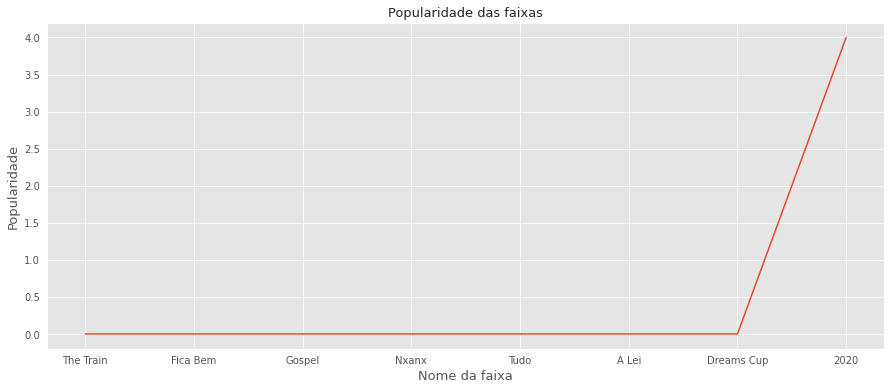

In [ ]:
#Gráfico da popularidade das músicas do albúm Real Plug Mixtape

plt.figure(figsize=(15,6))
ax = sns.lineplot(x='nome_da_faixa', y='popularidade', data=rmx);
ax.set_title('Popularidade das faixas', size=13);
ax.set_xlabel('Nome da faixa', size=13);
ax.set_ylabel('Popularidade', size=13);

A partir do gráfico de linha do seaborn á respeito da popularidade das músicas do albúm, já é possivel observar que de fato a música 2020 é um sucesso, tendo em vista que tem uma popularidade alta, levando em consideração as outras músicas do albúm e o fato da música fazer parte do albúm mais antigo. As outras músicas do albúm possuem igualmente uma popularidade igual a zero, logo, significa que a partir do calcúlo de popularidade do spotify, as músicas não estão sendo muito ouvidas para possuir uma popularidade maior que zero. 

####**Albúm Trap de Cria**

![Trap de Cria](https://resources.tidal.com/images/379a650e/3071/4aa7/a264/eb2a9f011589/640x640.jpg)

O albúm ou mixtape "Trap de Cria" foi o segundo albúm do artista e seu lançamento aconteceu no dia 29 de julho de 2019, diferente do primeiro albúm "Real plug mixtape", o alcance desse albúm foi maior e era de se esperar até mais alcance e visibilidade.Com uma pegada de músicas no estilo trap explícito, o albúm obtive músicas que receberam um bom alcance, comparado a músicas anteriores, porém sinto que o alcance, especificamente desse albúm ficou no "gostinho de quero mais", pela qualidade e empenho que foi colocado pelo artista e todos que de alguma forma contribuíram na construção do albúm. 

In [ ]:
#Quantidade de músicas do albúm
print(f'O albúm tem: {tcm["nome_da_faixa"].count()} faixas')

#Músicas do albúm
tcm[['posicao_da_faixa', 'nome_da_faixa']].reset_index(drop=True)

O albúm tem: 10 faixas


,posicao_da_faixa,nome_da_faixa
0,1,Trap de Cria
1,2,A Lista das Bandidas
2,3,A3
3,4,E Ai Fake
4,5,Video Call
5,6,Aliviando o Stress
6,7,Hino dos Irmãos
7,8,Bebê da Cara de Mal
8,9,Isso Que É Foda
9,10,Pjl


Ao total foram dez músicas, duas a mais que o primeiro albúm. Os destaques ficam para as músicas: "E ai Fake" construída com base na polêmica das conversas íntimas vazadas do jogador Neymar, "Video Call" e "PJL" que contou com a participação de integrantes da Hoodcave, produtora da qual o artista faz parte.

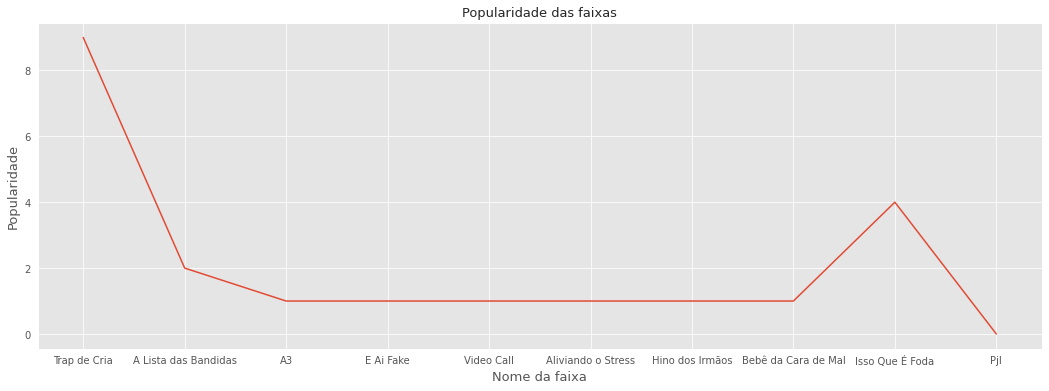

In [ ]:
plt.figure(figsize=(18,6))
ax = sns.lineplot(x='nome_da_faixa', y='popularidade', data=tcm);
ax.set_title('Popularidade das faixas', size=13);
ax.set_xlabel('Nome da faixa', size=13);
ax.set_ylabel('Popularidade', size=13);


Mesmo após o lançamento do albúm mais recente "Trap From Future", nota-se que a quantidade de músicas do albúm acolhida pelo público foi de fato maior do que o primeiro albúm "Real Plug Mixtape". Sendo até os dias atuais, ouvida uma parte significativa das músicas que compoem o albúm, com apenas a música "Pjl" possuindo uma frequência igual a zero. A música "Trap de Cria" que possue a maior popularidade, além de ser uma das mais ouvidas dos três álbuns, se tornou uma representação do que o albúm propoem, atraindo o público para as músicas seguintes.

####**Albúm Trap From Future**

![img](https://i.scdn.co/image/ab67616d0000b2731827b32ac6993a14c4f78615)

Trap From Future trata-se do albúm mais recente do artista e diferente dos dois albúns anteriores que na realidade eram mixtapes, esse de fato pode ser considerado um albúm e o primeiro do artista. O albúm foi lançado no dia 12 de março de 2020, sendo considerado como o trabalho mais sólido do artista e até mesmo elogiado pelo artista reconhecido, Matuê. Com uma capa de albúm futurista e cheia de referências, as músicas do albúm possuem uma versatilidade de estilo e estética totalmente diferente das músicas anteriores do artista.

In [ ]:
#Quantidade de músicas do albúm
print(f'O albúm tem: {tff["nome_da_faixa"].count()} faixas')

#Músicas do albúm
tff[['posicao_da_faixa', 'nome_da_faixa']].reset_index(drop=True)

O albúm tem: 15 faixas


,posicao_da_faixa,nome_da_faixa
0,1,Vem No Tum Tum
1,2,Drip Know Me
2,3,Match
3,4,Trap & Brega
4,5,Marca Sem Roupa
5,6,Wow!
6,7,Não Posso Morrer Novo
7,8,Fuck Cópias
8,9,Passa Nada
9,10,Novo Rock


Por ser o albúm mais recente, coseguentemente existe a probabilidade de ter mais músicas com uma popularidade maior do que músicas de albúns anteriores. O albúm conta com quinze músicas, quase o dobro de músicas do primeiro albúm "Real Plug", como mencionado anteriormente, o albúm possue uma grande versatilidade em suas músicas indo da mistura brega e trap na música "Trap&Brega" á musica com participação internacional. O que também foi possivel notar foi a leveza e a "visão" do artista em suas músicas, também sendo muito falado no albúm suas ambições e desejos para uma vida melhor.

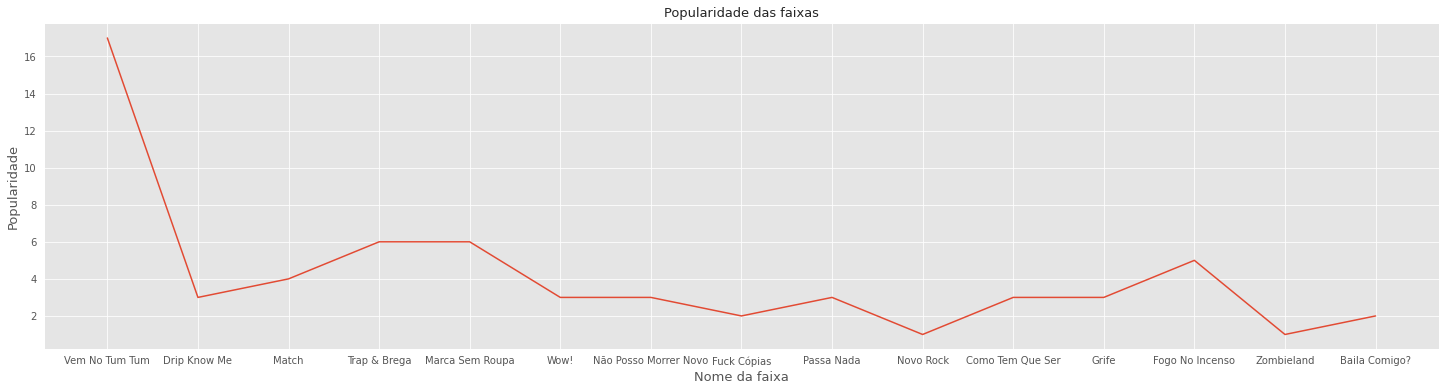

In [ ]:
plt.figure(figsize=(25,6))
ax = sns.lineplot(x='nome_da_faixa', y='popularidade', data=tff);
ax.set_title('Popularidade das faixas', size=13);
ax.set_xlabel('Nome da faixa', size=13);
ax.set_ylabel('Popularidade', size=13);

Nota-se que nenhuma música possui a popularidade igual a zero como nos albúns anteriores, entretanto, o fato de ser o albúm mais recente contribui para isso. Também é posivel notar que a música Trap&Brega cuja possivel uma proposta diferente de músicas anteriores do artista e até mesmo de músicas da cena do rap/trap, possui uma das popularidades mais altas do albúm, no momento em que foi feita a coleta desses dados. Além disso, músicas como "Marca Sem Roupa" e "Vem No Tum Tum" que tem o mesmo estilo de trap explicito e falam sobre a relação com uma outra pessoa, foram bem acolhidas pelo público, possuindo as maiores popularidades do albúm.

### **Q2: Quais músicas do artista NexoAnexo estão popular no momento?** 

O meu segundo questionamento é saber quais são as músicas do artista que estão popular no momento, lembrando sempre da regra de popularidade do spotify, onde as músicas mais populares são as que estão sendo mais ouvidas no momento e que as músicas que estão sendo analisadas são só as contidas nos álbuns. 

A popularidade das músicas podem alterar diariamente de acordo com o lançamento de novas músicas, logo, é provável que a popularidade das músicas mais recentes cresçam, enquanto a popularidade de músicas mais antigas diminuam. 

In [ ]:
#Músicas com maior popularidade no momento (Data: 27/06)
df[['nome_da_faixa', 'popularidade']].sort_values(ascending=False, by='popularidade').reset_index(drop=True)

,nome_da_faixa,popularidade
0,Vem No Tum Tum,17
1,Trap de Cria,9
2,Trap & Brega,6
3,Marca Sem Roupa,6
4,Fogo No Incenso,5
5,Isso Que É Foda,4
6,2020,4
7,Match,4
8,Wow!,3
9,Como Tem Que Ser,3


**Visualização de dados**

Após os dados serem transformados em informação na análise exploratória de dados, a informação ainda precisa se tornar útil para outras pessoas e conseguentemente pode ser utilizada, logo, a visualização de dados tem a responsabilidade de tornar a informação útil e de fácil entendimento, para que outras pessoas possam usar a informação. 
A etapa de visualizacao de dados está dentro da exploração de dados, com o objetivo de transmitir a informação retiradas dos dados e trata-se de uma das etapas mais importantes da análise exploratória. 

A visualização de dados pode ser definida dentro da ciência de dados como, "A formação de imagens visuais mentais para transmitir informações através de
representações gráficas de dados". De acordo com o Edward Tufte que é pioneiro no campo do desenvolvimento de visualizações efetivas e escreveu vários livros sobre o assunto, uma boa visualização de dados precisa seguir três regras: 

* Integridade gráfica
* Maximizar a proporção de dados e tinta
* Evitar lixo gráfico.

A integridade gráfica está relacionada a parte obscura da visualização de dados, onde não devemos através da visualização de dados e estatística buscar
enganar ou trapacear quem está visualizando o gráfico.

Para a regra de maximizar a proporção de dados e tintas deve ser levado em conta que quanto mais simples e claro um gráfico for, melhor, o famoso "menos é mais". Um dos problemas principais que envolvem a regra de maximização são os famosos gráficos de pizza e 3D. O principal problema de um gráfico de pizza e 3D são suas análises ser de difícil entendimento, tendo em vista, que não somos bons em fazer comparações de área.

A terceira regra de evitar lixo gráfico se trata de evitar elementos visuais estranhos ou que não tenham nenhum objetivo e que possam acabar distraindo quem está visualizando o gráfico, por mais que pareça algo simples, é essencial.



A partir do questionamento levantado, irei construir um gráfico das músicas que estão popular no momento. Para tal, será usada a biblioteca "Seaborn" pela sua simplicidade e por possuir paramêtros que são muito utéis para construir uma visualização de dados que respeite as três regras essenciais de uma boa visualização de dados, mencionadas anteriormente. Por outro lado, com a biblioteca "Matplotlib" para construir uma boa visualização de dados e gerar gráficos visualmente adequados, o nível de dificuldade é maior, sendo necessario um conhecimento maior dos parametros e funcionalidade disponiveis da biblioteca. Por isso, foi escolhida a biblioteca "Seaborn".

In [ ]:
#Retornar as 10 músicas que estão popular e transformar em uma variavel para construir o gráfico
musicas_populares = df[['nome_da_faixa', 'popularidade']].sort_values(ascending=False, by='popularidade').reset_index(drop=True)[:20]

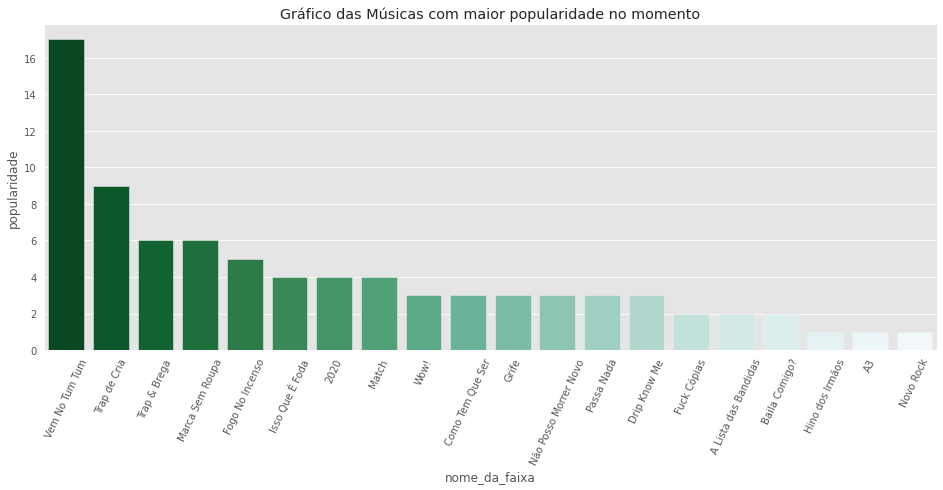

In [ ]:
#Plotar gráfico de barras com seaborn das músicas que estão popular
plt.figure(figsize=(16,6))
ax = sns.barplot(x= 'nome_da_faixa', 
                 y = 'popularidade', 
                 data = musicas_populares, 
                 palette = sns.color_palette("BuGn_r", n_colors=len(musicas_populares)))
ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
ax.set_title('Gráfico das Músicas com maior popularidade no momento');


As duas primeiras músicas que estão popular no momento são "Trap de Cria" do segundo albúm Trap de Cria e "Vem No Tum Tum" do mais recente albúm Trap From Future, mas o que chama atenção é que ambas estão na primeira posição dos seus álbuns, levantando uma nova hipotese de que se a popularidade das músicas tem relação com as suas posições. Tendo em vista que á música que está na posição um sempre é ouvida quando inicia a playlist. Mas não é só isso que dá pra observar, a música "2020" do primeiro albúm Real Plug está a frente de muitas músicas do recente albúm Trap From Future. 


### **Q3: Verificando se a popularidade das faixas tem relação com sua posição**

A primeira música de um albúm, pode se tornar popular por sempre iniciar a playlist do albúm, mas a primeira música que está com uma popularidade alta nem sempre é a mais ouvida, por isso é preciso ter cuidado. Por outro lado, agora é preciso descobrir se a popularidade das músicas seguintes dos álbuns seguem de acordo com suas posições.

**Albúm Trap From Future**

In [ ]:
#Popularidade e posição das músicas do albúm Trap From Future
tff[['nome_da_faixa', 'posicao_da_faixa', 'popularidade']].sort_values(ascending=False, by='popularidade').reset_index(drop=True)

,nome_da_faixa,posicao_da_faixa,popularidade
0,Vem No Tum Tum,1,17
1,Trap & Brega,4,6
2,Marca Sem Roupa,5,6
3,Fogo No Incenso,13,5
4,Match,3,4
5,Drip Know Me,2,3
6,Wow!,6,3
7,Não Posso Morrer Novo,7,3
8,Passa Nada,9,3
9,Como Tem Que Ser,11,3


Nota-se que se a posição das músicas tivessem relação com as suas popularidades, após a primeira música, as músicas seguintes deveriam de forma decrescente ir diminuindo suas popularidades, o que não acontece. A segunda música do albúm "Drip Know Me" que de acordo com a hipotese nula deveria ser a segunda mais ouvida, ocupa a sexta posição da popularidade do albúm, com uma popularidade igual á três.

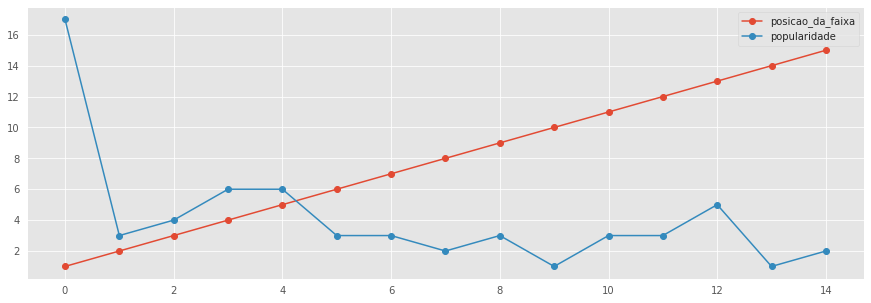

In [ ]:
#Gráfico comparativo da posição da música em relação á sua popularidade
dados = tff[['posicao_da_faixa','popularidade']]

fig, ax = plt.subplots(figsize = (15,5))
dados.plot(kind='line', marker='o', ax=ax)
plt.show()


Diferente do primeiro gráfico, esse gráfico foi construído com a biblioteca "Matplotlib" por se tratar de um gráfico que transmite a informação de forma clara para quem está visualizando e por sua facilidade ao se construir. Com o gráfico é possivel observar que a popularidade das músicas que estão na posição um à cinco tem uma crescente, mas depois a popularidade não segue mais um padrão de acordo com a posição. Lembrar que o gráfico está representado pelo index, ou seja, a música com posição um está representada como zero e assim em diante. 

**Albúm Trap de Cria**

In [ ]:
#Popularidade e posição das músicas do albúm Trap de Cria
tcm[['nome_da_faixa', 'posicao_da_faixa', 'popularidade']].sort_values(ascending=False, by='popularidade').reset_index(drop=True)

,nome_da_faixa,posicao_da_faixa,popularidade
0,Trap de Cria,1,9
1,Isso Que É Foda,9,4
2,A Lista das Bandidas,2,2
3,A3,3,1
4,E Ai Fake,4,1
5,Video Call,5,1
6,Aliviando o Stress,6,1
7,Hino dos Irmãos,7,1
8,Bebê da Cara de Mal,8,1
9,Pjl,10,0


Assim como no albúm Trap From Future, a música mais popular deste albúm é a que está na primeira posição e por mais que muitas músicas do albúm não estejam com a popularidade em alta, ainda é possivel observar que a música "Isso Que É Foda" que ocupa a penúltima posição do albúm é a segunda com maior popularidade.

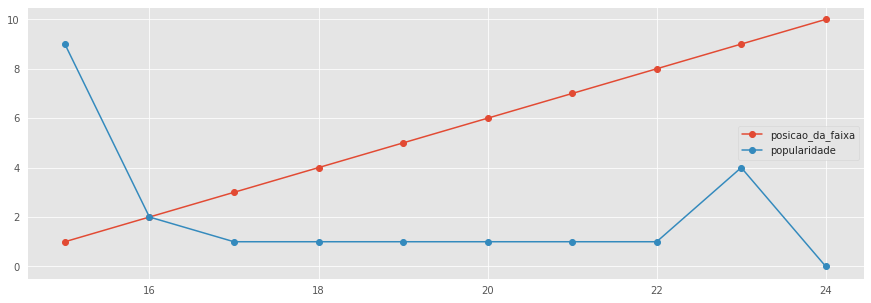

In [ ]:
#Gráfico comparativo da posição da música em relação á sua popularidade
dados = tcm[['posicao_da_faixa','popularidade']]

fig, ax = plt.subplots(figsize = (15,5))

dados.plot(kind='line', marker='o', ax=ax)
plt.show()

Diferente do gráfico comparativo da posição da música em relação á sua popularidade do albúm mais recente Trap From Future, no gráfico do segundo albúm já é possivel observar que dificilmente a popularidade das músicas seguem um padrão de acordo com as suas posições.

**Albúm Real Plug**

In [ ]:
#Popularidade e posição das músicas do albúm Trap From Future
rmx[['nome_da_faixa','posicao_da_faixa', 'popularidade']].reset_index(drop=True)

,nome_da_faixa,posicao_da_faixa,popularidade
0,The Train,1,0
1,Fica Bem,2,0
2,Gospel,3,0
3,Nxanx,4,0
4,Tudo,5,0
5,A Lei,6,0
6,Dreams Cup,7,0
7,2020,8,4


Por se tratar do albúm mais antigo, a primeira música do albúm não é a mais ouvida, como nos dois últimos álbuns. Por outro lado, ainda que esteja na última posição do albúm, a música "2020" é a única música do albúm que ainda tem a popularidade em alta e se a sua popularidade for comparada à popularidade de músicas do albúm mais recente "Trap From Future", "2020" pode ser considerada de fato um sucesso!

Ainda que, se os três álbuns forem comparados, a música "2020" é a única que possui a popularidade em alta, estando na ultima posição de um albúm.

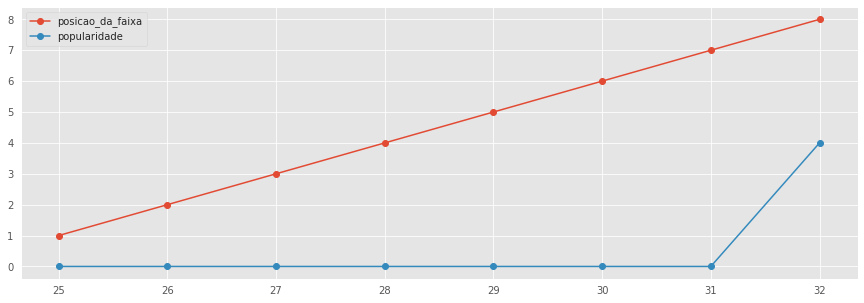

In [ ]:
#Gráfico comparativo da posição da música em relação á sua popularidade
dados = rmx[['posicao_da_faixa','popularidade']]

fig, ax = plt.subplots(figsize = (15,5))
dados.plot(kind='line', marker='o', ax=ax)
plt.show()

É incrivel como a música "2020" ainda possui um bom alcance! Mesmo que a popularidade atual não seja tão alta, a música está a frente de grandes músicas do albúm mais recente "Trap From Future", como as músicas "Wow!", "Grife" e "Não Posso Morrer Novo Mano".

O que fica claro é que a popularidade de uma música só tem relação com a sua posição para a primeira música, devido que elas iniciam automaticamente a playlist do albúm, conseguemente é considerada ouvida e resultando num erro de maior popularidade. 



**Correlação (Estatística Multivariada)**

Agora será feito uma correlação da popularidade das músicas com as suas posições, através das variáveis popularidade e posição. Aplicando conceitos de estatística multivariada, para averiguar se realmente a posição da faixa não tem relação com a popularidade. Aplicando o metodo de correlação de estatistica multivariada.

A análise com estatística multivariada consiste em considerar duas ou mais variáveis simultaneamente e entender como elas se relacionam. Existem dois coeficientes de correlação que são populares para realizar a análise, **Pearson e Spearman.** Para essa análise de correlação da popularidade das músicas e suas posições será usado o coeficiente "Spearman".

O coeficiente de Spearman foi escolhido por avaliar se a tendência de uma variável crescer ou diminuir faz com que a outra variável também cresça ou diminua. Nesse caso, a tendência da variável Popularidade crescer ou diminuir em relação a posição. 

In [ ]:
#Correlação com Spearman
df[['posicao_da_faixa', 'popularidade']].corr(method='spearman')

,posicao_da_faixa,popularidade
posicao_da_faixa,1.000000,0.034384
popularidade,0.034384,1.000000


Se a correlão das variáveis atingir -1, significa que sempre que uma variável aumenta a outra diminui, por outro lado, se atinge 1, sempre que uma variável aumenta a outra variável também aumenta. Na correlação que foi feita das variáveis popularidade e posição da faixa, nota-se que existe uma correlação muito fraca da posição da faixa com a popularidade, com uma correlação de 0.034.

### **Q5: Qual a classificação da popularidade?**

É essencial que em uma análise exploratória de dados se aplique um pouco de estátistica para entender como os dados se comportam, por isso, agora a EDA será mais voltada para o lado estatístico. Primeiramente, para entender como os dados da coluna popularidade estão distribuidos, será aplicado o método estatístico **describe()**, o método é responsável por retornar um resumo estatístico dos dados, sendo muito importante para um primeiro entendimento estatístico dos dados e até mesmo identificar outliers, se os dados forem muito discrepantes.

In [ ]:
#Resumo estatístico com Describe
df['popularidade'].describe()

count    33.000000
mean      2.636364
std       3.352408
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max      17.000000
Name: popularidade, dtype: float64

Com o resumo estatístico dos dados, já consigo observar que a popularidade mais alta é igual a dezessete e a menor popularidade é igual a zero, apesar de serem dois valores que possuem uma grande diferença, não se pode considerar ou entender que existe outliers presentes, por saber que essa diferença é normal na coluna popularidade, devido a regra de popularidade do spotify. Nota-se também que a média da popularidade é igual a dois e sesenta e três, uma média que pode ser considerada baixa. 

### **Aplicando estatistica descritiva univariada**

Uma das estatística que se pode aplicar na EDA é a estatística descritiva univariada. A estatítica descritiva univariada pode ser aplicada quando se está interessado em estabelecer medidas que resumem quantitivamente uma variável, logo, essas medidas dirão sobre a tendência de centralidade dos dados e suas dispersões. Medidas como: Média, Variância, Desvio padrão, Curtose e Assimetria. 

### **Q7: Qual a média da popularidade por álbum?**

A média é uma das principais medidas de tendência central dos dados e que demonstra a concentração dos dados de uma distribuição. Por isso tão importante entender e interpretar bem o seu valor. O calcúlo de uma média pode ser feito da seguinte forma:

$$\hat{\mu} = \bar{X} = \sum_{X} X p(X)$$

In [ ]:
#Média da popularidade por álbum
media_popularidade = df.groupby('nome_do_album')['popularidade'].mean().reset_index().sort_values(ascending=False, by='popularidade')
media_popularidade 

,nome_do_album,popularidade
2,Trap from Future,4.133333
1,Trap de Cria Mixtape,2.100000
0,Real Plug Mixtape,0.500000


Nada fora do normal, já era de se esperar que o Albúmm Trap From Future possuísse a maior média de popularidade e o albúm Real Plug a menor média de populuridade, por serem o albúm mais recente e antigo, respectivamente. Porém, é possivel notar que o albúm Trap From Future possue a popularidade acima da média, tendo em vista que a média da popularidade é igual a dois e sessenta e três. Por outro lado, o albúm Trap de Cria possue uma popularidade abaixo da média.

### **Construindo uma nova coluna de acordo com a média da popularidade (Engenharia de Recursos)**

O que agora será feito pode ser chamado de engenharia de recursos, a engenharia de recursos ou feature engineering é aplicada principalmente em projetos de Machine Learning, onde é preciso fornecer ao algoritmo de machine learning novos recursos que representem melhor o problema, para que obtenha um melhor desempenho do modelo. A engenharia de recursos pode ser definida como o processo de transformar dados brutos em recursos que representem melhor o problema subjacente aos modelos de machine learning. 

No mundo real, os dados dificilmente estarão prontos para serem consumidos e servirem como dados de entrada para os modelos. Por isso, na maioria dos casos grande parte do tempo de um projeto de machine learning é gasto com a engenharia de recursos.

In [ ]:
#Nova coluna de acordo com o valor da média da popularidaded
df['frequencia_de_popularidade_das_musicas'] = ['Acima da média' if x > 2.63 else 'Abaixo da média' for x in df['popularidade']]

A coluna foi construída usando uma fução built-in chamada list comprehension, por sua praticidade ao construir um código em uma única linha, mesmo usando condicionais e loops. A música que estiver com uma popularidade acima de 2.63, consequentemente está acima da média de popularidade. Logo, a música que estiver com a popularidade abaixo de 2.63, está com abaixo da média de popularidade.

A partir da construção dessa nova coluna ou recurso é possível explorar e usar mais os dados, sendo esse um dos objetivos da engenharia de recursos.

### **Q8: Quantas músicas estão acima da média da popularidade?**

Iniciando uma exploração da nova coluna, é possível identificar a quantidade e quais são as músicas que estão acima e abaixo da média. O que pode gerar novas perguntas e hipóteses.

In [ ]:
#Quantidade de músicas que estão acima e abaixo da média
df['frequencia_de_popularidade_das_musicas'].value_counts()

Abaixo da média    19
Acima da média     14
Name: frequencia_de_popularidade_das_musicas, dtype: int64

Em sua maioria as músicas encontram-se abaixo da média, algo que não é bom. Porém, isso se dá pelo fato de a maioria das músicas que pertencem aos dois álbuns Real Plug e Trap de Cria, não possuírem uma popularidade tão alta por não serem albúns tão recentes. Enquanto, as músicas mais recentes e com popularidade alta pertencem ao albúm Trap From Future, logo, em menor quantidade, comparado a soma dos dois álbuns que vieram antes.

### **Q9: Quais são as músicas que estão acima da média no momento?**

In [ ]:
#Músicas que estão acima da média
df.query("frequencia_de_popularidade_das_musicas == 'Acima da média' ").sort_values(ascending=False, by='popularidade').reset_index()[['nome_do_album', 'nome_da_faixa', 'popularidade', 'frequencia_de_popularidade_das_musicas']]

,nome_do_album,nome_da_faixa,popularidade,frequencia_de_popularidade_das_musicas
0,Trap from Future,Vem No Tum Tum,17,Acima da média
1,Trap de Cria Mixtape,Trap de Cria,9,Acima da média
2,Trap from Future,Trap & Brega,6,Acima da média
3,Trap from Future,Marca Sem Roupa,6,Acima da média
4,Trap from Future,Fogo No Incenso,5,Acima da média
5,Trap from Future,Match,4,Acima da média
6,Trap de Cria Mixtape,Isso Que É Foda,4,Acima da média
7,Real Plug Mixtape,2020,4,Acima da média
8,Trap from Future,Drip Know Me,3,Acima da média
9,Trap from Future,Wow!,3,Acima da média


Nota-se que como dito anteriormente, a maioria das músicas que estão acima da média pertencem ao albúm mais recente "Trap From Future", tendo em vista, que a regra de popularidade do spotify se dá pelas músicas que estão sendo mais ouvidas no momento. Por outro lado, os dois álbuns mais antigos "Real Plug" e "Trap de Cria" possuem cada um, uma música acima da média, "2020" do albúm Real Plug e "Trap de Cria" do albúm "Trap de Cria". Destaque para essas duas músicas que mesmo não sendo recentes, possuem a popularidade maior que muitas músicas do albúm recente "Trap From Future".

### **Q10: Quantas músicas que estão acima da média não estão na primeira posição do albúm?**

Ao total são quatorze músicas que estão acima da média e por mais que nessa análise já tenha se compravado que a posição da música no albúm não interfere em sua popularidade. É interessante saber quantas músicas não estão na primeira posição do albúm a partir das quatorze músicas que estão acima da média. 

In [ ]:
df.query("frequencia_de_popularidade_das_musicas == 'Acima da média' & posicao_da_faixa != '1' ").sort_values(ascending=False, by='popularidade').reset_index()[['nome_da_faixa', 'posicao_da_faixa', 'frequencia_de_popularidade_das_musicas']]

,nome_da_faixa,posicao_da_faixa,frequencia_de_popularidade_das_musicas
0,Trap & Brega,4,Acima da média
1,Marca Sem Roupa,5,Acima da média
2,Fogo No Incenso,13,Acima da média
3,Match,3,Acima da média
4,Isso Que É Foda,9,Acima da média
5,2020,8,Acima da média
6,Drip Know Me,2,Acima da média
7,Wow!,6,Acima da média
8,Não Posso Morrer Novo,7,Acima da média
9,Passa Nada,9,Acima da média


É notorio que a maioria das músicas que estão acima da média não estão na primeira posição do albúm, sendo 12 músicas acima da média e não estão na primeira posição do albúm. Aumentando a comprovação de que a posicao da música não tem relação com a popularidade. 

Em casos reais, a exploração dos dados deve chegar ao fim quando o pessoal da área de negocios se sentirem satisfeitos ou quando os objetivos das informações retiradas dos dados forem alcançados. Neste caso, acredito que o meu objetivo de analisar e entender os dados á respeito dos álbuns do artista NexoAnexo chegou ao fim, as informações descobertas cobrem o que era de objetivo ao iniciar a análise de dados. 

##**Gravar arquivo CSV do notebook para criar aplicação/dashboard**

Agora irei gravar o notebook da análise em um arquivo no formato CSV para criar a aplicação/dashboard com Python.

In [ ]:
#Salvando o notebook em um arquivo no formato csv
df.to_csv('NexoAnexoFinal.csv')

## **Construindo Aplicação/Dashboard com Python + Deploy com Heroku**

### **Aplicação com Streamlit**

O Streamlit é um framework do Python destinado a construção de dashboard,sendo a maneira mais fácil para cientistas de dados e engenheiros de machine learning criar aplicativos bonitos e de alto desempenho em apenas algumas horas, como está dito em seu próprio site. A facilidade de construir uma aplicação com Streamlit só deixa claro quanto o Python é poderoso. 

A aplicação construída com Streamlit para o projeto de análise de dados dos álbuns do artista NexoAnexo, apresenta os gráficos e conclusoes das análises que foram desenvolvidas no projeto, nesse notebook. 

Em meu GitHub está disponível o [código fonte](https://github.com/luislauriano/Aplicacao_NexoAnexo/blob/main/app.py) desenvolvido da aplicação do projeto.

[Documentação do Streamlit](https://docs.streamlit.io/en/stable/)

### **Colocar aplicação disponivel através do Heroku**

Após a aplicação ter sido construída com Streamlit, para ficar disponível na Web ainda é preciso realizar o que é chamado de Deploy. O deploy nada mais é que disponibilizar um sistema para uso, seja num ambiente de desenvolvimento, para testes ou em produção. Nesse caso, colocar a aplicação do projeto desenvolvida com streamlit em produção através do Heroku. 

O Heroku é uma plataforma na nuvem que permite aos os usuarios colocarem seus projetos disponíveis na web sem muita dificuldade, sendo esse um dos motivos da escolha de colocar a aplicação do projeto em produção através do Heroku. A partir de uma aplicação que pode ser construída em diversas linguagens, a plataforma consegue colocar a aplicação pra rodar num servidor em um dos seus data centers. 

Após a aplicação ter sido colocada em produção com o Heroku, agora é possivel visualizar a [Aplicação do Projeto](http://analise-nexoanexo.herokuapp.com/) na Web. 

[Tutorial para colocar uma aplicação Streamlit em produção com o Heroku](https://medium.com/@gustavo_domingues/como-fazer-deploy-de-sua-aplica%C3%A7%C3%A3o-streamlit-no-heroku-5fc1d2609df7#:~:text=email%40dominio.com-,Deploy,site%2C%20ent%C3%A3o%20escolha%20algo%20legal.&text=Sempre%20que%20quiser%20atualizar%20ou,basta%20seguir%20os%20passos%20abaixo.)






## **Referências**

https://towardsdatascience.com/getting-started-to-data-analysis-with-python-pandas-with-titanic-dataset-a195ab043c77

https://pt.qwe.wiki/wiki/Missing_data

https://medium.com/@lucasoliveiras/limpeza-e-prepara%C3%A7%C3%A3o-dos-dados-com-pandas-856e844abfbb

https://colab.research.google.com/drive/1Sn8uueWB9PpF8bg62Ef_qseKChnp8biq

https://dandaramcsousa.github.io/2020/05/20/tutorial-api-spotify.html

https://itl.nist.gov/div898/handbook/eda/eda.htm

https://www.kaggle.com/pavansanagapati/a-simple-tutorial-on-exploratory-data-analysis

https://jtemporal.com/deploy-flask-heroku/

https://www.youtube.com/watch?v=mQ7rGcE766k&list=WL&index=2&t=0s
https://medium.com/@gustavo_domingues/como-fazer-deploy-de-sua-aplica%C3%A7%C3%A3o-streamlit-no-heroku-5fc1d2609df7#:~:text=email%40dominio.com-,Deploy,site%2C%20ent%C3%A3o%20escolha%20algo%20legal.&text=Sempre%20que%20quiser%20atualizar%20ou,basta%20seguir%20os%20passos%20abaixo.